# Done by -> Abhishek kulkarni

## Number recognition using MNSIT dataset and CNN

In [1]:
# importing necessary modules and libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

# importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# importing keras libraries
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# reading our train dataset
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv').astype('float32')
print(df.head(8))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0    1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2    1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6    7.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7    3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3  

## lets do data preprocessing

In [3]:
# dividing the dataset into training and validation
X = df.drop('label',axis = 1) # dropping label so that we can have predictable feature of same in 'y'
y = df['label']

In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.33) # we will keep sample size as 33%

In [5]:
# reshaping our data so that it best fits into our model
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("df on train set: ", train_x.shape)
print("df on test set: ", test_x.shape)

df on train set:  (28140, 28, 28)
df on test set:  (13860, 28, 28)


In [6]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New train set: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New test set: ", test_X.shape)

New train set:  (28140, 28, 28, 1)
New test set:  (13860, 28, 28, 1)


In [7]:
train_yOHE = to_categorical(train_y, num_classes = 10, dtype='int')
print("Number of label of train: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 10, dtype='int')
print("Number of label of test: ", test_yOHE.shape)

Number of label of train:  (28140, 10)
Number of label of test:  (13860, 10)


## Lets do some Data Analysis(EDA)

In [8]:
y_int = np.int0(y)
count = np.zeros(10, dtype='int')
print(count)
for i in y_int:
   count[i] +=1

[0 0 0 0 0 0 0 0 0 0]


In [9]:
unique_values = list(set(y))

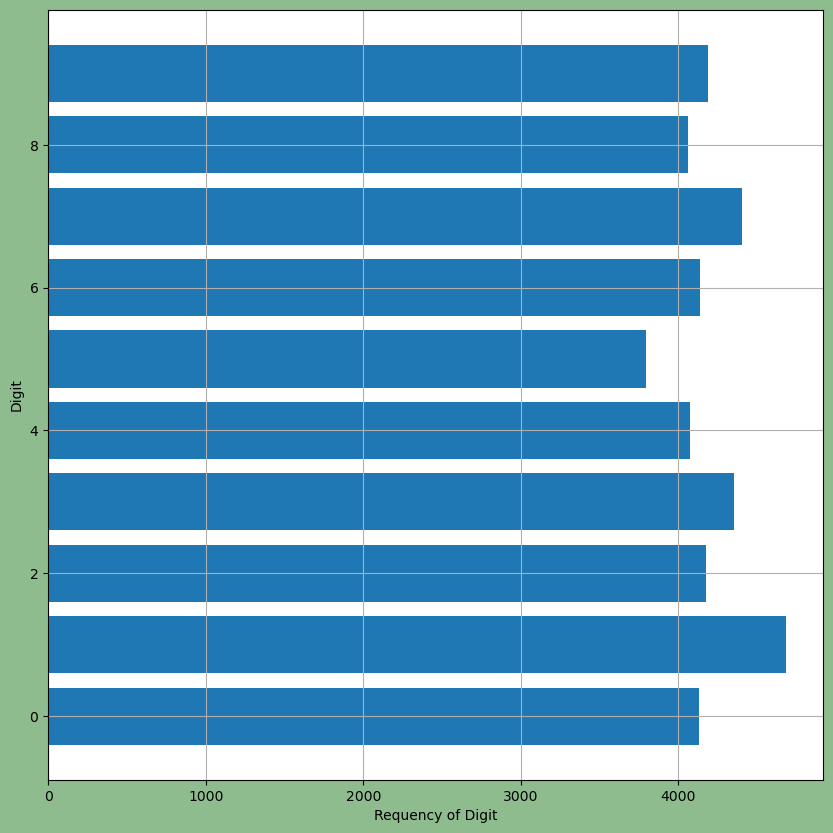

In [27]:
fig, ax = plt.subplots(1,1, figsize=(10,10),facecolor='#8FBC8F')
ax.barh(unique_values, count)
plt.xlabel("Frequency of Digit")
plt.ylabel("Digit")
plt.grid()
plt.show()

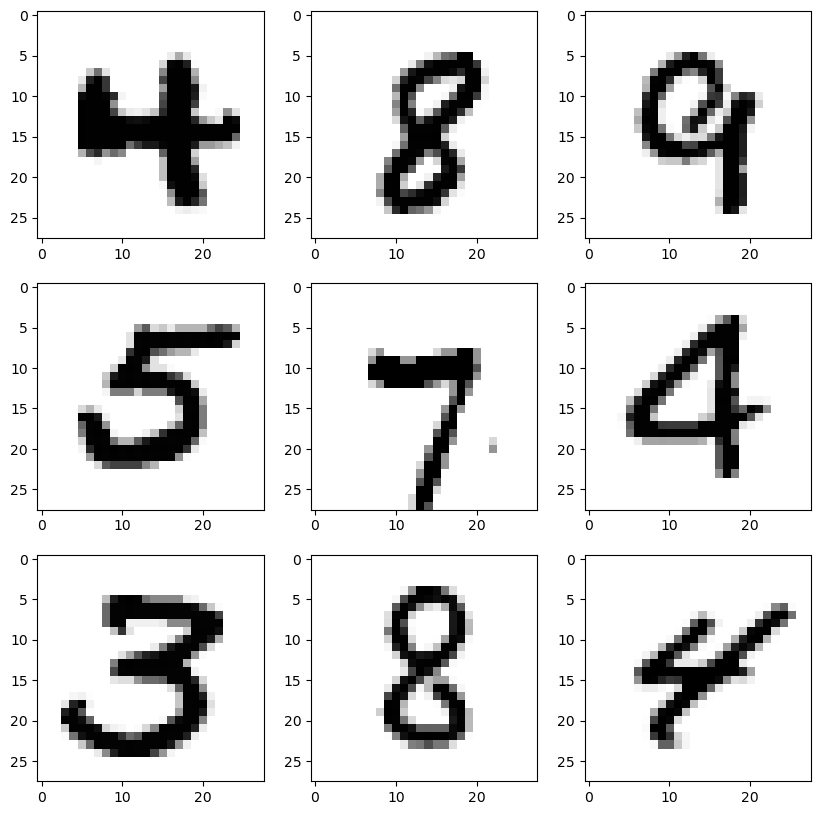

In [29]:
shuff = shuffle(train_x[:10])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

## Train our model

In [13]:
from __future__ import print_function
import tensorflow
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as k
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical

### Adding convolutional layers

In [14]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
#number of node
model.add(Dense(128,activation ="relu"))
#number of classes
model.add(Dense(10,activation ="softmax"))

### 4.3. Train model

In [16]:
model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=10,  validation_data = (test_X,test_yOHE))

Epoch 1/10
880/880 [==============================] - 28s 30ms/step - loss: 0.3742 - accuracy: 0.9090 - val_loss: 0.0845 - val_accuracy: 0.9747
Epoch 2/10
880/880 [==============================] - 26s 29ms/step - loss: 0.0762 - accuracy: 0.9775 - val_loss: 0.0966 - val_accuracy: 0.9714
Epoch 3/10
880/880 [==============================] - 24s 27ms/step - loss: 0.0529 - accuracy: 0.9829 - val_loss: 0.0784 - val_accuracy: 0.9766
Epoch 4/10
880/880 [==============================] - 23s 27ms/step - loss: 0.0479 - accuracy: 0.9855 - val_loss: 0.1173 - val_accuracy: 0.9698
Epoch 5/10
880/880 [==============================] - 23s 26ms/step - loss: 0.0425 - accuracy: 0.9871 - val_loss: 0.0757 - val_accuracy: 0.9796
Epoch 6/10
880/880 [==============================] - 23s 26ms/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.0562 - val_accuracy: 0.9860
Epoch 7/10
880/880 [==============================] - 23s 26ms/step - loss: 0.0311 - accuracy: 0.9903 - val_loss: 0.0600 - val_accuracy:

In [17]:
print("Validation Accuracy (on test set):", history.history['val_accuracy'])
print("Accuracy on train set:", history.history['accuracy'])
print("Validation Loss (on test set):", history.history['val_loss'])
print("Loss on train set :", history.history['loss'])

Validation Accuracy (on test set): [0.9747474789619446, 0.9713563919067383, 0.9766233563423157, 0.9698412418365479, 0.9795815348625183, 0.9860028624534607, 0.9858585596084595, 0.9862914681434631, 0.9800865650177002, 0.9735930562019348]
Accuracy on train set: [0.908990740776062, 0.977469801902771, 0.9829424023628235, 0.9855365753173828, 0.9871357679367065, 0.9878109693527222, 0.9902985095977783, 0.9904406666755676, 0.990973711013794, 0.993425726890564]
Validation Loss (on test set): [0.0844515785574913, 0.09664429724216461, 0.07840922474861145, 0.11734690517187119, 0.07568904012441635, 0.056203436106443405, 0.06003580614924431, 0.06067309528589249, 0.09670556336641312, 0.1474674791097641]
Loss on train set : [0.37422966957092285, 0.07621108740568161, 0.05293935164809227, 0.04786142334342003, 0.04248795285820961, 0.03852716088294983, 0.03107786923646927, 0.031045550480484962, 0.027574770152568817, 0.022577157244086266]


***lets save our model***

In [18]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

## lets predict our model

In [19]:
df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv').astype('float32')
df.head(8)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
test = np.reshape(df.values, (df.shape[0], 28,28))
test.shape

(28000, 28, 28)

In [21]:
test_set = test.reshape(test.shape[0],test.shape[1],test.shape[2],1)
test_set.shape

(28000, 28, 28, 1)

In [ ]:
shuff = shuffle(test[:10])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [22]:
predictions = model.predict(test_set)

875/875 [==============================] - 6s 7ms/step


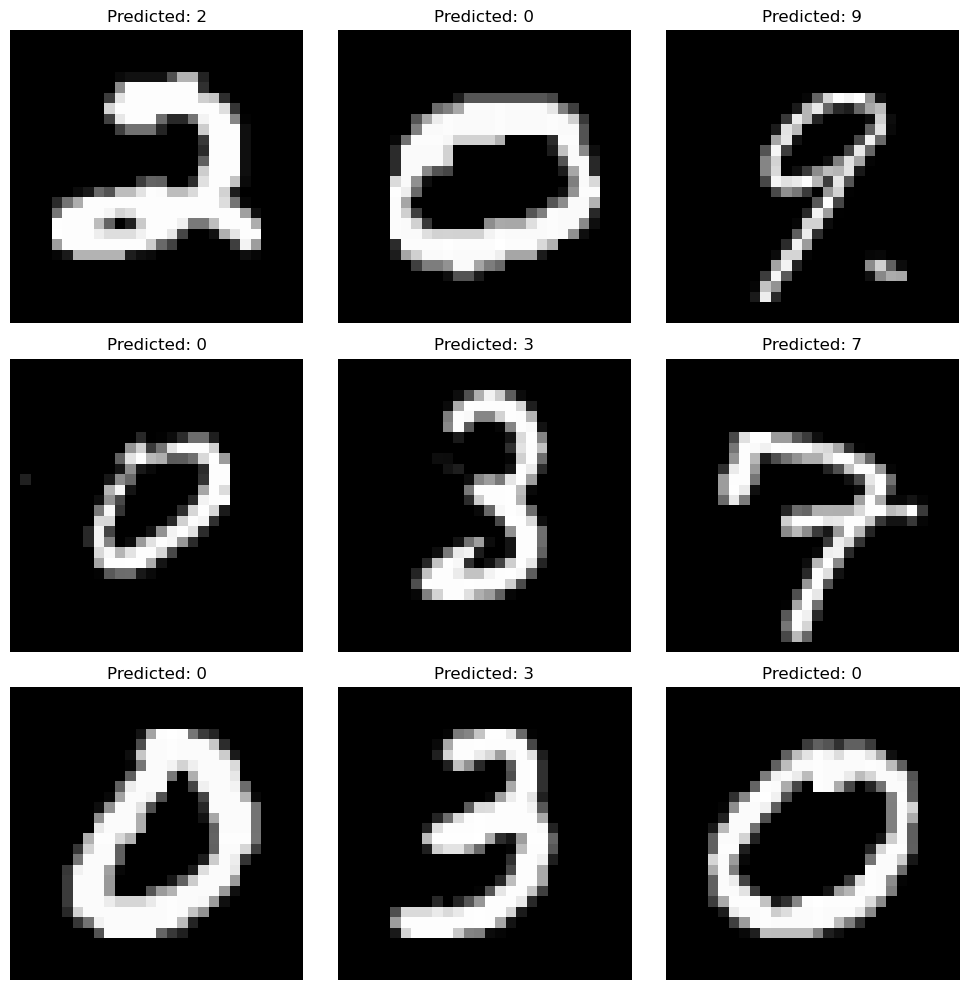

In [24]:
shuff = shuffle(test[:10])

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i in range(9):
    # Get the predicted label with the highest probability
    predicted_label = np.argmax(predictions[i])
    
    axes[i].imshow(test_set[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('Predicted: {}'.format(predicted_label))

plt.tight_layout()
plt.show()